In [1]:
#pip install matplotlib numpy pandas seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
import random
import sys
from itertools import combinations
import scipy.cluster.hierarchy as shc
import os
%cd ..
from src import bingo, evolution_simulator
import time
os.getcwd()

/home/mounim/Projects/BiNGO-3C/notebooks


'/home/mounim/Projects/BiNGO-3C/notebooks'

In [2]:
Benchmarking = []

In [3]:
ref1 = open("./data/Benchmarking/dataset/ref1.fasta").read()
ref2 = open("./data/Benchmarking/dataset/ref2.fasta").read()
len(ref1)

29732

In [4]:
Benchmarking = []

In [ ]:
L = 100
while L < len(ref1) and L < len(ref2):
    L =int(L)
    S1 = ref1[0:L]
    S2 = ref2[0:L]
    print("*"*20+str(L) + "*"*20)
    evolution_simulator.to_fasta(S1,'S1', "./data/Benchmarking/dataset/") #sequence of lenght L
    logfile = open('perf.txt','a+')
    print('S11G5:')
    size, gap, d = 11,5,5
    start = time.time()
    dictSeqs = bingo.dict_of_seqs_from_fasta_file("./data/Benchmarking/dataset/S1.fasta") #load from file
    delim = bingo.random_delimiter(d) #select delimiter
    dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    words1 = bingo.generate_words_from_dictSeq(dicSubseqs, s=size, w=gap, verbose=False, n_parallel=12, convert_to_binary=True)
    dictSeqs = bingo.dict_of_seqs_from_fasta_file("./data/Benchmarking/dataset/S2.fasta") #load from file
    delim = bingo.random_delimiter(d) #select delimiter
    dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    words2 = bingo.generate_words_from_dictSeq(dicSubseqs, s=size, w=gap, verbose=False, n_parallel=12, convert_to_binary=True)
    words = {**words1, **words2}
    scores = bingo. compute_jaccard_scores(words, n_parallel=12)
    end = time.time()
    print(end - start)
    logfile.write( 'BiNGO-3C' + str(size) + '-'+ str(gap) + ',' + str(L) +',' + str(end - start)+ '\n' )
    Benchmarking.append(['BiNGO-3C Gap=5', L, end - start])
    
    

    print('S11G1:')
    size, gap, d = 11,1,5
    start = time.time()
    dictSeqs = bingo.dict_of_seqs_from_fasta_file("./data/Benchmarking/dataset/S1.fasta") #load from file
    delim = bingo.random_delimiter(d) #select delimiter
    dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    words1 = bingo.generate_words_from_dictSeq(dicSubseqs, s=size, w=gap, verbose=False, n_parallel=12, convert_to_binary=True)
    dictSeqs = bingo.dict_of_seqs_from_fasta_file("./data/Benchmarking/dataset/S2.fasta") #load from file
    delim = bingo.random_delimiter(d) #select delimiter
    dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    words2 = bingo.generate_words_from_dictSeq(dicSubseqs, s=size, w=gap, verbose=False, n_parallel=12, convert_to_binary=True)
    words = {**words1, **words2}
    scores = bingo. compute_jaccard_scores(words, n_parallel=12)
    end = time.time()
    print(end - start)
    logfile.write( 'BiNGO-3C' + str(size) + '-'+ str(gap) + ',' + str(L) +',' + str(end - start)+ '\n' )
    Benchmarking.append(['BiNGO-3C Gap=1 (Kmers)', L, end - start])


    print('S100G50:')
    size, gap, d = 100,50,5
    start = time.time()
    dictSeqs = bingo.dict_of_seqs_from_fasta_file("./data/Benchmarking/dataset/S1.fasta") #load from file
    delim = bingo.random_delimiter(d) #select delimiter
    dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    words1 = bingo.generate_words_from_dictSeq(dicSubseqs, s=size, w=gap, verbose=False, n_parallel=12, convert_to_binary=True)
    dictSeqs = bingo.dict_of_seqs_from_fasta_file("./data/Benchmarking/dataset/S2.fasta") #load from file
    delim = bingo.random_delimiter(d) #select delimiter
    dicSubseqs = bingo.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    words2 = bingo.generate_words_from_dictSeq(dicSubseqs, s=size, w=gap, verbose=False, n_parallel=12, convert_to_binary=True)
    words = {**words1, **words2}
    scores = bingo. compute_jaccard_scores(words, n_parallel=12)
    end = time.time()
    print(end - start)
    logfile.write( 'BiNGO-3C' + str(size) + '-'+ str(gap) + ',' + str(L) +',' + str(end - start)+ '\n' )
    Benchmarking.append(['BiNGO-3C Gap=5', L, end - start])
    

    f12 = open('./data/Benchmarking/dataset/S12.fasta','w')
    f12.write('>S1\n')
    f12.write(S1.replace('\n',''))
    f12.write(S1.replace('\s',''))
    f12.write(S1.replace('\t',''))
    f12.write(S1.replace(' ',''))
    f12.write('\n>S2\n')
    f12.write(S2.replace('\n',''))
    f12.write(S2.replace('\s',''))
    f12.write(S2.replace('\t',''))
    f12.write(S2.replace(' ',''))
    f12.write(S2)

    print('MAFFT:')
    start = time.time()
    # os.system("mafft --auto "+ sequences_filename + ' > outfile')  
    os.system("mafft /data/Benchmarking/dataset/S12.fasta > MAFFT_out 2>> log 1>>log")  
    end = time.time()
    logfile.write( 'MAFFT' + ',' + str(L) +',' + str(end - start)+ '\n' )
    Benchmarking.append(['MAFFT ', L, end - start])
    print(end - start)


    end = time.time()
    print('MASH:')
    os.system("mash sketch  "+ "./data/Benchmarking/dataset/S1.fasta" )  
    os.system("mash sketch  "+ "./data/Benchmarking/dataset/S2.fasta" )  
    os.system("mash dist  "+ "./data/Benchmarking/dataset/S1.fasta.msh ./data/Benchmarking/dataset/S2.fasta.msh  2>> log 1>>log" )  
    print(end - start)
    logfile.write( 'MASH' + ',' + str(L) +',' + str(end - start)+ '\n' )
    Benchmarking.append(['MASH ', L, end - start])


    print('clustalw:')
    if L<5000:
        start = time.time()
        os.system("clustalw ./data/Benchmarking/dataset/S12.fasta > outfile 2>> log 1>>log")  
        end = time.time()
        print(end - start)
        Benchmarking.append(['CLUSTAL-W ', L, end - start])
        logfile.write( 'CLUSTAL-W' + ',' + str(L) +',' + str(end - start)+ '\n' )


    print('FSWM:')
    start = time.time()
    os.system("./src/FSWM-master/fswm ./data/Benchmarking/dataset/S12.fasta" )  
    end = time.time()
    Benchmarking.append(['FSWM ', L, end - start])
    logfile.write( 'FSWM' + ',' + str(L) +',' + str(end - start)+ '\n' )

    print('ANDI:')
    os.system("./src/FSWM-master/fswm ./data/Benchmarking/dataset/S12.fasta" )  
    end = time.time()
    print(end - start)
    Benchmarking.append([' ANDI ', L, end - start])
    logfile.write( 'ANDI' + ',' + str(L) +',' + str(end - start)+ '\n' )
    

    
    L = L + 200


benchmark = pd.DataFrame(Benchmarking)

benchmark.columns = ['Method','Sequence_length','Processing_time']
benchmark.to_csv('./benchmark.csv')


,0,1,2
0,BiNGO-3C11-5,2300,0.246017
1,BiNGO-3C11-1,2300,0.227542
2,BiNGO-3C100-50,2300,0.228293
3,MAFFT,2300,0.040998
4,MASH,2300,0.041065
...,...,...,...
968,BiNGO-3C100-50,29500,0.396907
969,MAFFT,29500,0.059862
970,MASH,29500,0.060045
971,FSWM,29500,0.322574


L,2300,2500,2700,2900,3100,3300,3500,3700,3900,4100,...,27700,27900,28100,28300,28500,28700,28900,29100,29300,29500
Method,,,,,,,,,,,,,,,,,,,,,
ANDI,0.486615,0.480011,0.498106,0.568409,0.486970,0.492049,0.533336,0.472697,0.490849,0.549901,...,0.624223,0.632084,0.686024,0.751637,0.613457,0.699562,0.661950,0.641740,0.777274,0.634713
BiNGO-3C100-50,0.228293,0.218451,0.218817,0.198246,0.276000,0.261709,0.235196,0.325517,0.208724,0.281890,...,0.326204,0.427900,0.414514,0.393322,0.472538,0.389740,0.541456,0.514506,0.389041,0.396907
BiNGO-3C11-1,0.227542,0.228528,0.224930,0.205628,0.277425,0.256277,0.247000,0.349822,0.206385,0.248839,...,0.306157,0.505917,0.586448,0.369035,0.494352,0.530230,0.429711,0.449871,0.417427,0.393946
BiNGO-3C11-5,0.246017,0.226569,0.225027,0.211514,0.301428,0.239669,0.276431,0.371064,0.196123,0.204177,...,0.295906,0.300452,0.471049,0.448844,0.567128,0.602811,0.399301,0.413961,0.444393,0.438148
CLUSTAL-W,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FSWM,0.246917,0.233232,0.252853,0.283669,0.248027,0.243229,0.277276,0.241144,0.239509,0.262786,...,0.328225,0.316797,0.345868,0.339199,0.323056,0.313316,0.354430,0.315596,0.391960,0.322574
MAFFT,0.040998,0.039108,0.037882,0.040158,0.039248,0.040954,0.038333,0.047396,0.037176,0.041822,...,0.043062,0.059133,0.060390,0.051316,0.064192,0.056156,0.061866,0.063081,0.052521,0.059862
MASH,0.041065,0.039172,0.037969,0.040261,0.039311,0.041009,0.038386,0.047462,0.037238,0.041919,...,0.043233,0.059461,0.060525,0.051367,0.064255,0.056210,0.061935,0.063233,0.052637,0.060045


<AxesSubplot:xlabel='L', ylabel='Method'>

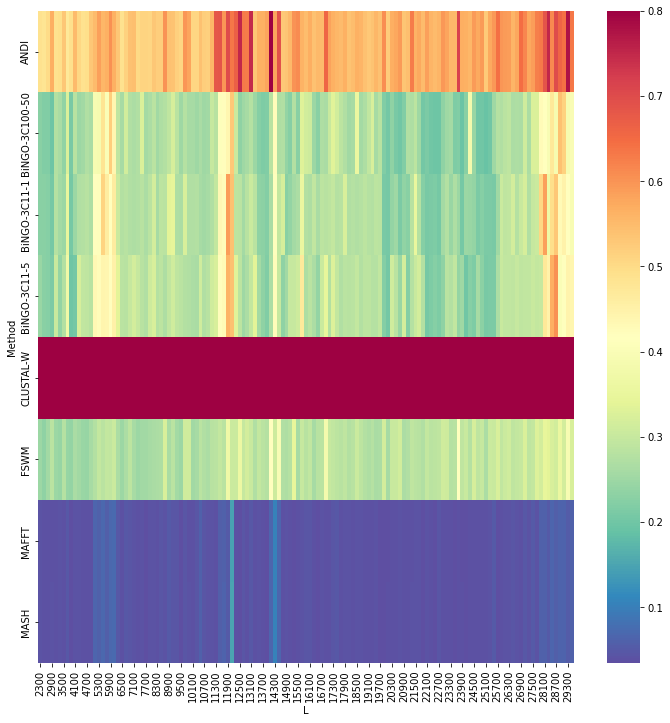

In [13]:
thr = .8
df = pd.read_csv('perf.txt', header=None)
display(df)
df.columns = ['Method','L','t']
M = pd.pivot_table(data = df, columns='L', index='Method', values='t')
# print(M.max(axis=1))
M[M>thr] = thr 
display(M)
M = M.fillna(thr)
plt.subplots(figsize=[12,12])
sns.heatmap(M, cmap='Spectral_r')

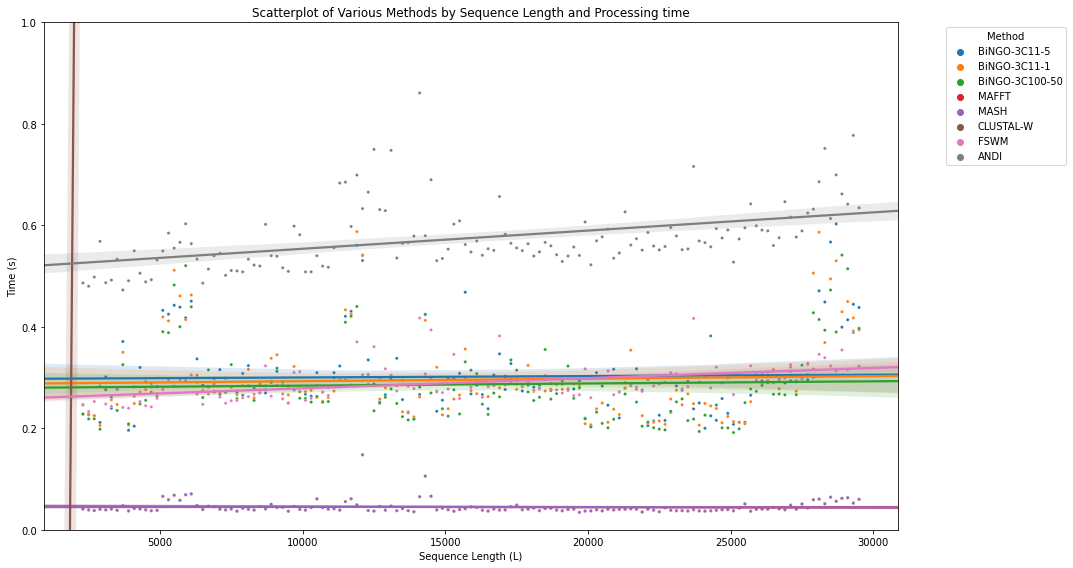

In [23]:
df
plt.figure(figsize=(15, 8))
df2 = df
# df2 = df2[df2['t']<1]
sns.scatterplot(data=df2, x="L", y="t", hue="Method", s = 10)

# Adding a regression line for each method
for method in df2['Method'].unique():
    sns.regplot(data=df2[df2['Method'] == method], x="L", y="t", scatter=False, truncate=False)

plt.title("Scatterplot of Various Methods by Sequence Length and Processing time")
plt.xlabel("Sequence Length (L)")
plt.ylabel("Time (s)")
plt.ylim(0, 1)  # Setting the y-axis limit to show values less than 1
plt.legend(title="Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_37191/4257417818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark[benchmark.iloc[:,2] > .5 ][2] = 0.5


<AxesSubplot:xlabel='None-1', ylabel='0'>

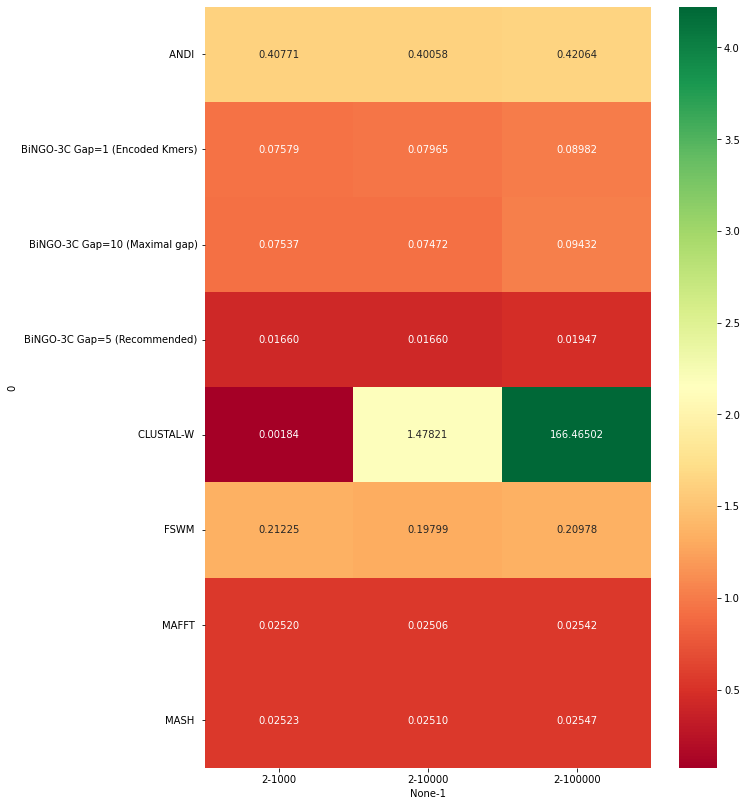

In [ ]:
benchmark = pd.DataFrame(Benchmarking)
benchmark[benchmark.iloc[:,2] > .5 ][2] = 0.5
benchmark
matrix = pd.pivot_table(data = benchmark, columns=[1],  index=[0])
matrix.droplevel(0, axis=1) 
matrix.droplevel(1, axis=1) 
colormap = sns.color_palette("vlag")

plt.figure(figsize=(10, 14))

sns.heatmap(np.log10((matrix)*100+1), annot=matrix, fmt='.5f', cmap='RdYlGn')
